<a href="https://colab.research.google.com/github/anshu57/Credit-Card-Default-Prediction-Supervised-Machine-Learning-Classification-/blob/main/Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

#Importing

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [7]:
pip install pandas==1.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.9 MB 4.8 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5


In [8]:
pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 2.7 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [87]:
dataset = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Capstone Projects/Supervised ML Classification (Credit Card Default Prediction )/default of credit card clients.xls')

#Dataset Inspection

In [88]:
dataset.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [89]:
dataset.shape

(30001, 25)

#Thought Process



In [90]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30001 non-null  object
 1   X1          30001 non-null  object
 2   X2          30001 non-null  object
 3   X3          30001 non-null  object
 4   X4          30001 non-null  object
 5   X5          30001 non-null  object
 6   X6          30001 non-null  object
 7   X7          30001 non-null  object
 8   X8          30001 non-null  object
 9   X9          30001 non-null  object
 10  X10         30001 non-null  object
 11  X11         30001 non-null  object
 12  X12         30001 non-null  object
 13  X13         30001 non-null  object
 14  X14         30001 non-null  object
 15  X15         30001 non-null  object
 16  X16         30001 non-null  object
 17  X17         30001 non-null  object
 18  X18         30001 non-null  object
 19  X19         30001 non-null  object
 20  X20   

#Handling Missing Data

In [91]:
dataset.isnull().sum()

Unnamed: 0    0
X1            0
X2            0
X3            0
X4            0
X5            0
X6            0
X7            0
X8            0
X9            0
X10           0
X11           0
X12           0
X13           0
X14           0
X15           0
X16           0
X17           0
X18           0
X19           0
X20           0
X21           0
X22           0
X23           0
Y             0
dtype: int64

Data do not contain any null values.

#Univariate Analysis

In [92]:
dataset['Unnamed: 0']

0           ID
1            1
2            2
3            3
4            4
         ...  
29996    29996
29997    29997
29998    29998
29999    29999
30000    30000
Name: Unnamed: 0, Length: 30001, dtype: object

In [93]:
#First column Unnamed 0 contains ID so removing it, index can act as id.
dataset.drop('Unnamed: 0',axis =1,inplace = True)

In [94]:
dataset.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


Since it is given that variables:
X1 to X11 are categorical variables,
X12 to X23 are Numerical variables.

In [95]:
dataset.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'Y'],
      dtype='object')

In [96]:
categorical_var = ['X2', 'X3', 'X4', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11']


In [99]:
numerical_var = ['X1','X5','X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22',
       'X23']

In [100]:
numerical_var

['X1',
 'X5',
 'X13',
 'X14',
 'X15',
 'X16',
 'X17',
 'X18',
 'X19',
 'X20',
 'X21',
 'X22',
 'X23']

In [101]:
dataset_copy = dataset.iloc[1:,:]

In [102]:
dataset_copy.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


0    23364
1     6636
Name: Y, dtype: int64


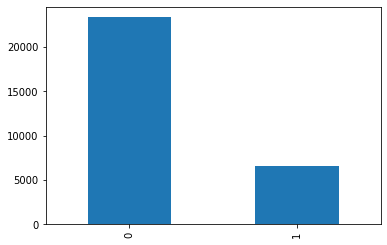

In [124]:
#target value count
print(dataset_copy['Y'].value_counts())
dataset_copy['Y'].value_counts().plot(kind='bar')

Dataset is highly imbalanced.

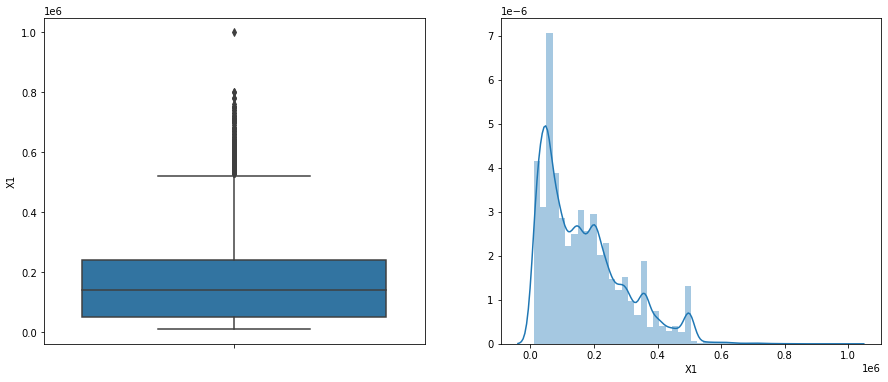

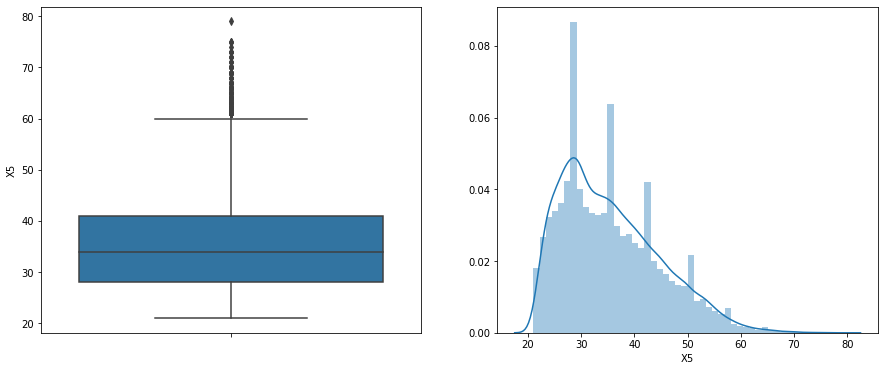

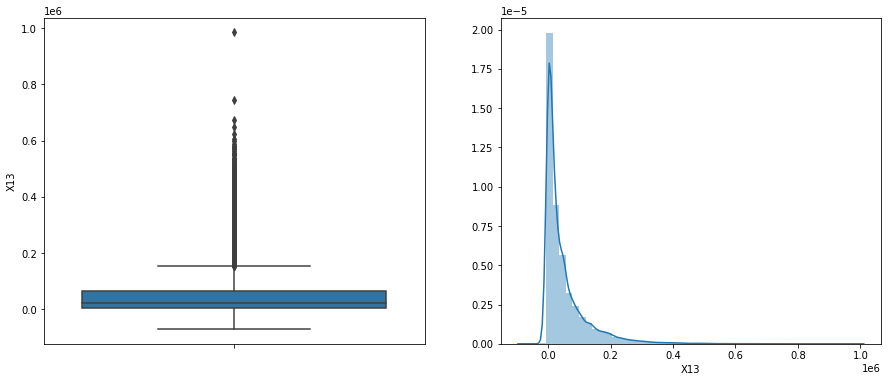

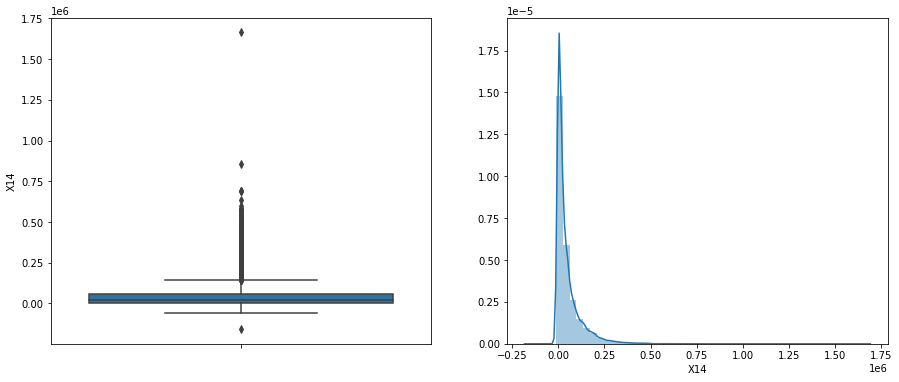

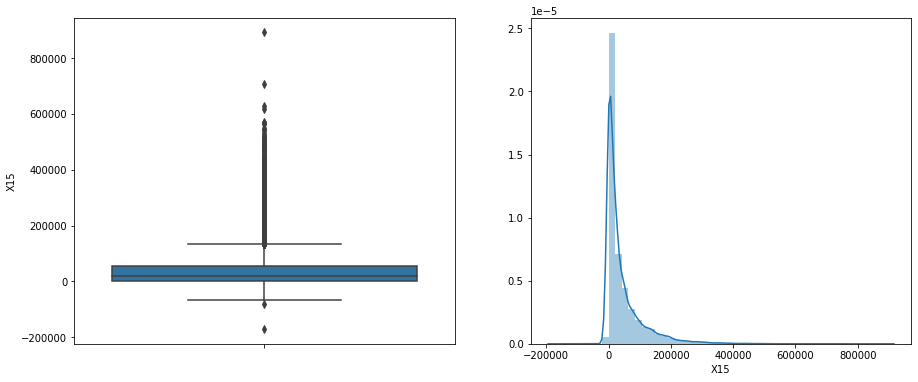

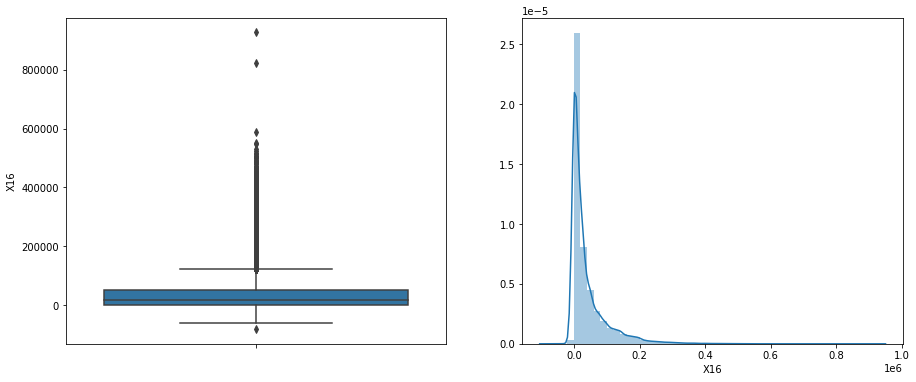

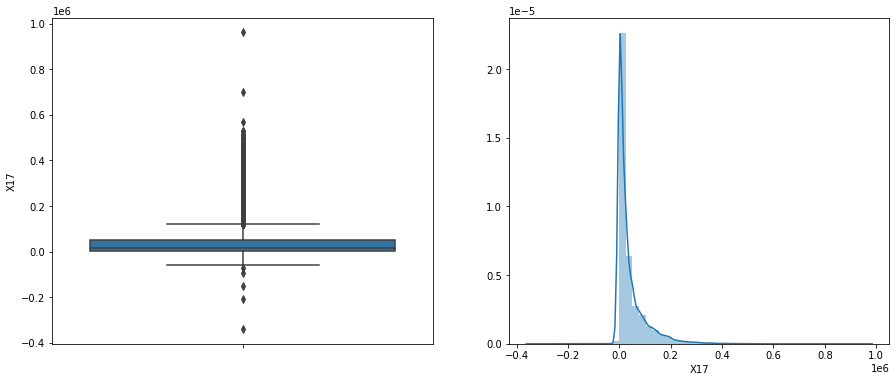

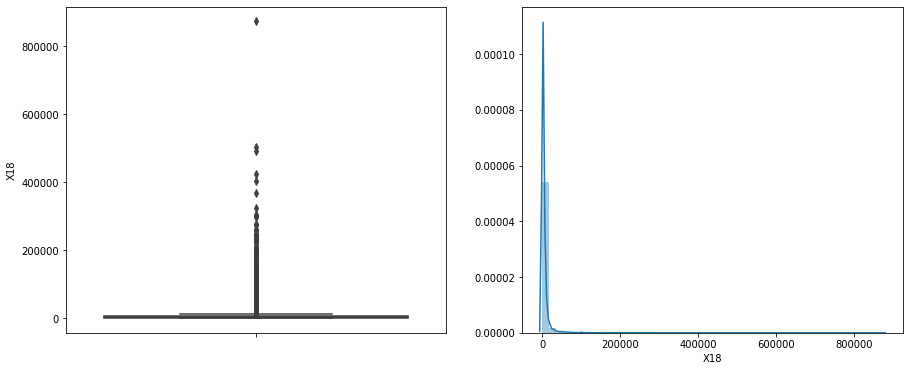

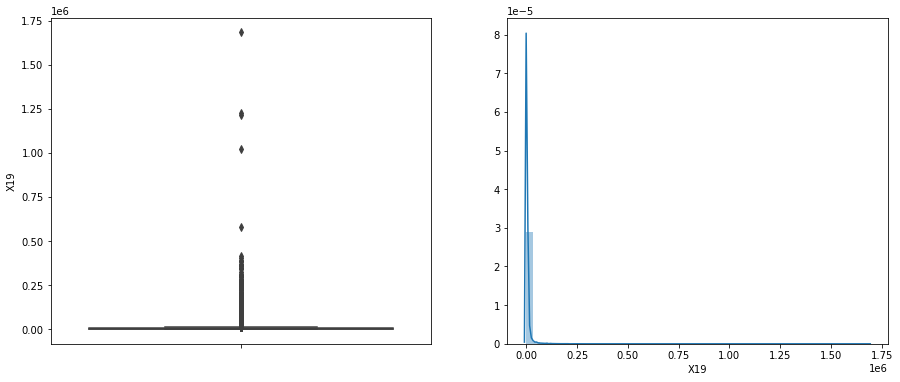

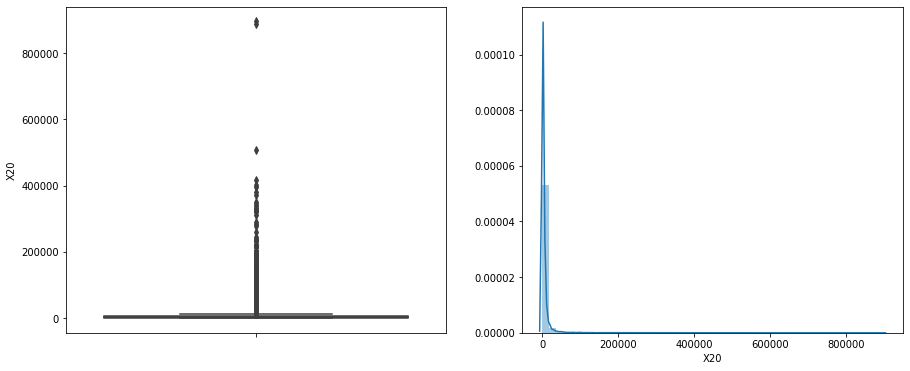

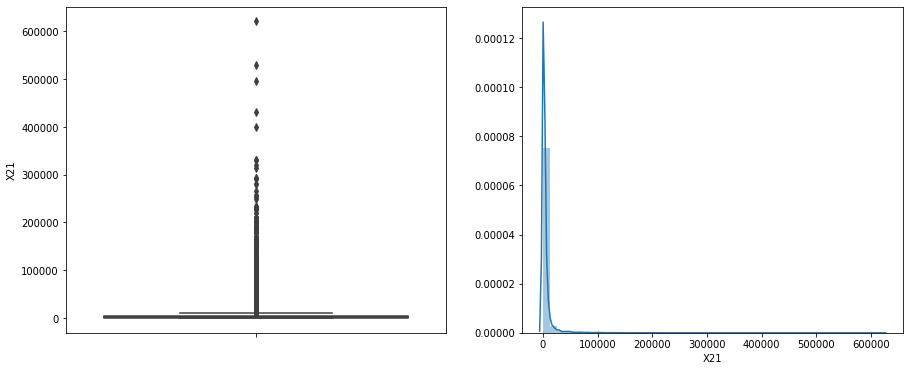

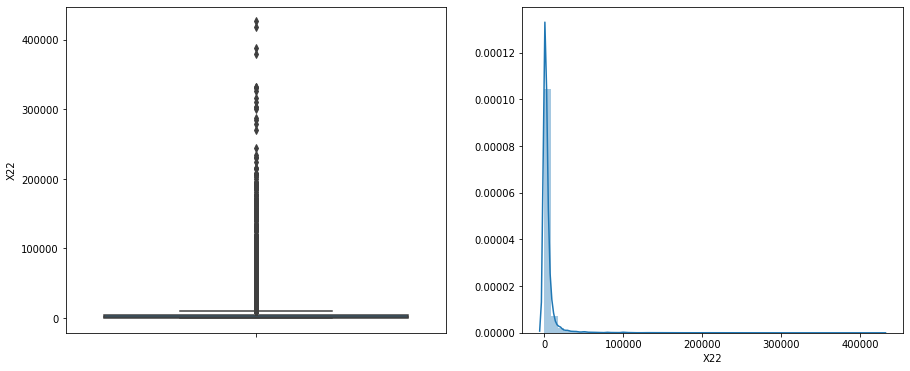

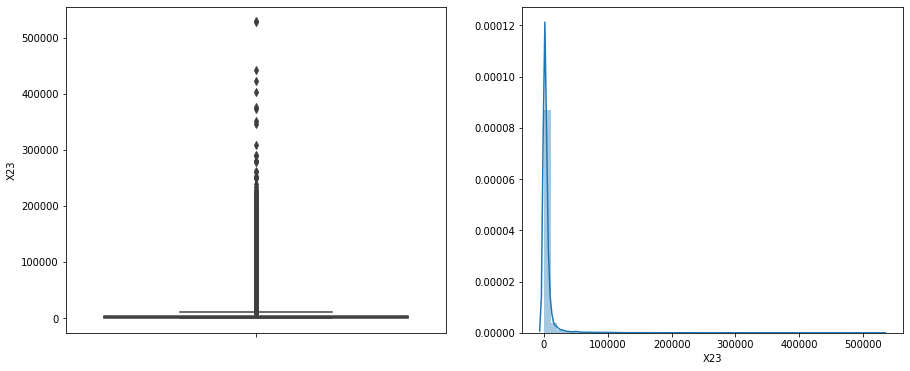

In [103]:
for var in numerical_var:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=dataset_copy[var])
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(dataset_copy[var].dropna())
    fig.set_ylabel('')
    fig.set_xlabel(var)
    plt.show()

In [104]:
#Capping the outlier rows with Percentiles
def outlier_removal(upp_per,low_per,var):
  upper_lim = dataset_copy[var].quantile(upp_per)
  lower_lim = dataset_copy[var].quantile(low_per)
  dataset_copy.loc[(dataset_copy[var] > upper_lim),var] = upper_lim
  dataset_copy.loc[(dataset_copy[var] < lower_lim),var] = lower_lim
  


In [105]:
def box_plott(var):
  plt.figure(figsize=(15,6))
  plt.subplot(1, 2, 1)
  fig = sns.boxplot(y=dataset_copy[var])
  fig.set_title('')
  fig.set_ylabel(var)
      
  plt.subplot(1, 2, 2)
  fig = sns.distplot(dataset_copy[var].dropna())
  fig.set_ylabel('')
  fig.set_xlabel(var)
  plt.show()

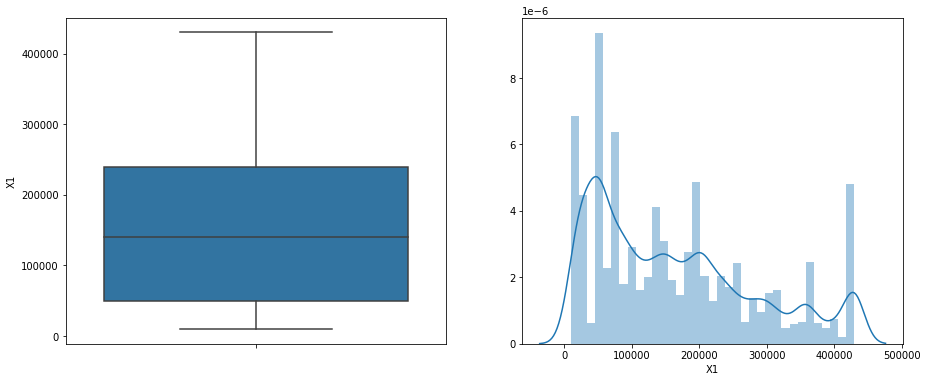

In [106]:
# Lets remove outliers using capping for X1 Variable
outlier_removal(0.95,0,'X1')
box_plott('X1')


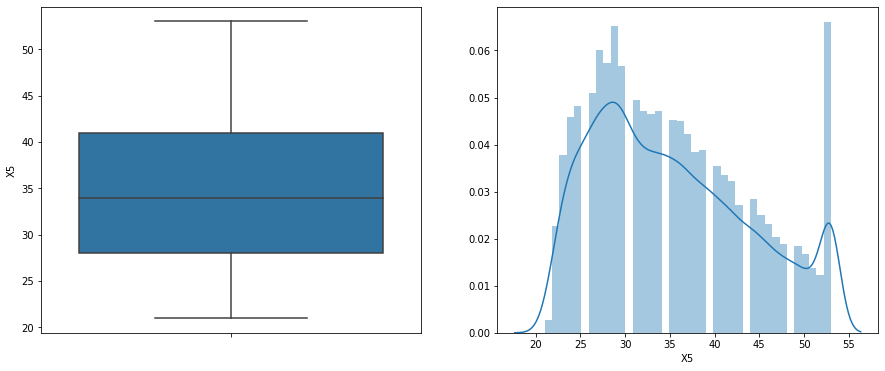

In [108]:
# Lets remove outliers using capping for X1 Variable
outlier_removal(0.95,0,'X5')
box_plott('X5')


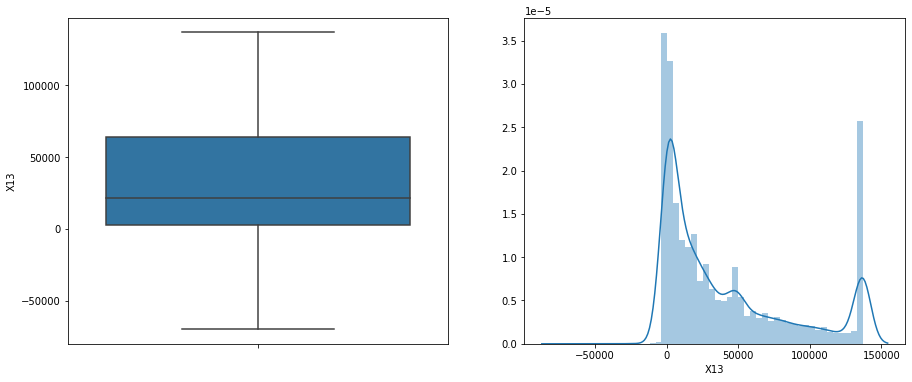

In [109]:
# Lets remove outliers using capping for X13 Variable
outlier_removal(0.90,0,'X13')
box_plott('X13')


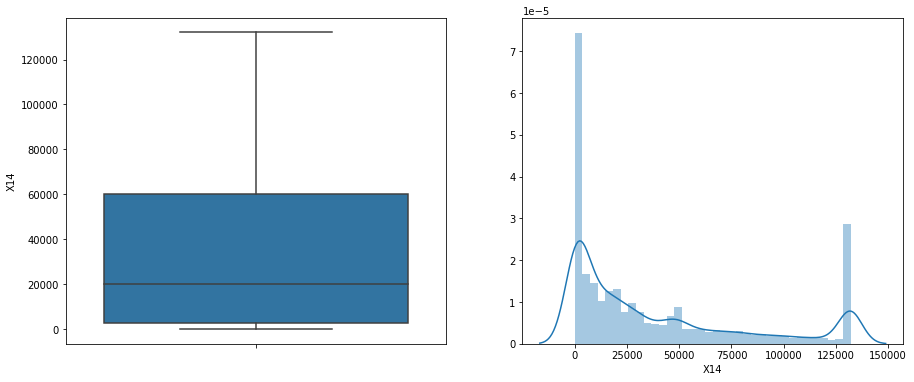

In [110]:
# Lets remove outliers using capping for X14 Variable
outlier_removal(0.90,0.02,'X14')
box_plott('X14')


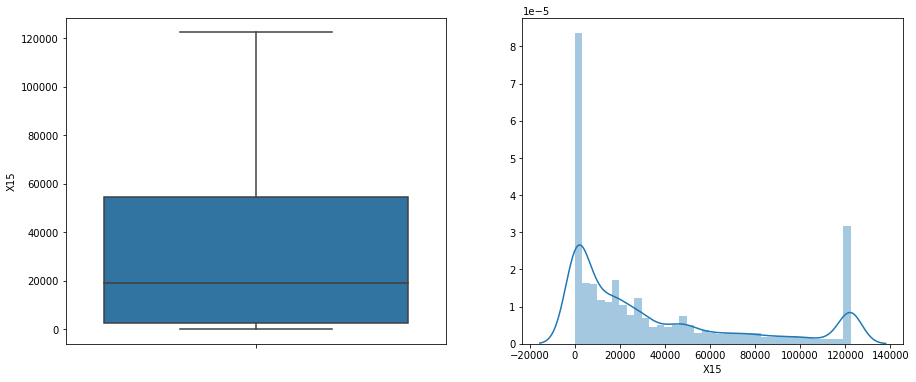

In [111]:
# Lets remove outliers using capping for X15 Variable
outlier_removal(0.90,0.05,'X15')
box_plott('X15')


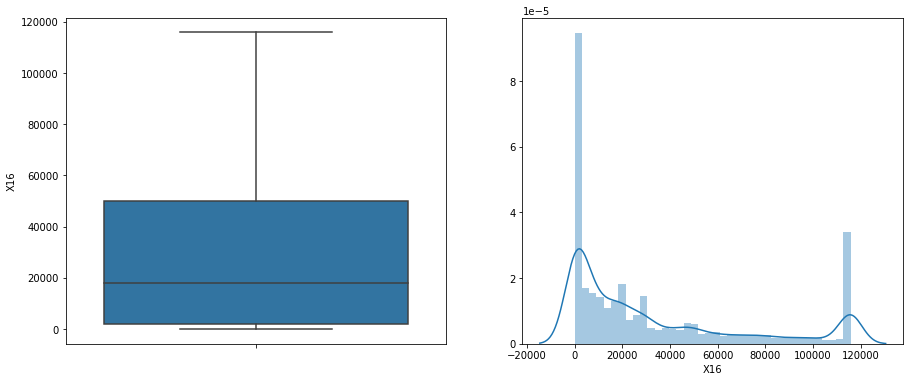

In [112]:
# Lets remove outliers using capping for X16 Variable
outlier_removal(0.90,0.03,'X16')
box_plott('X16')


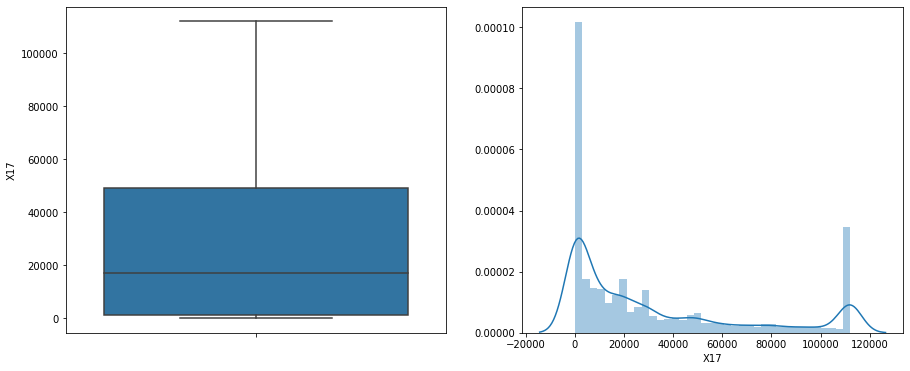

In [113]:
# Lets remove outliers using capping for X17 Variable
outlier_removal(0.90,0.05,'X17')
box_plott('X17')


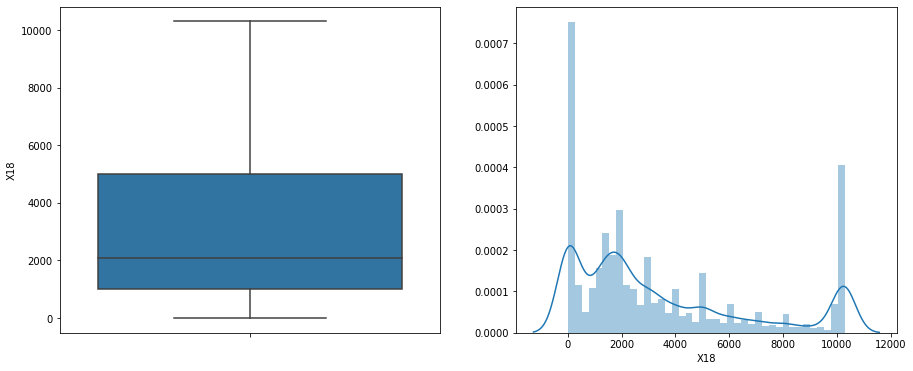

In [114]:
# Lets remove outliers using capping for X18 Variable
outlier_removal(0.90,0,'X18')
box_plott('X18')


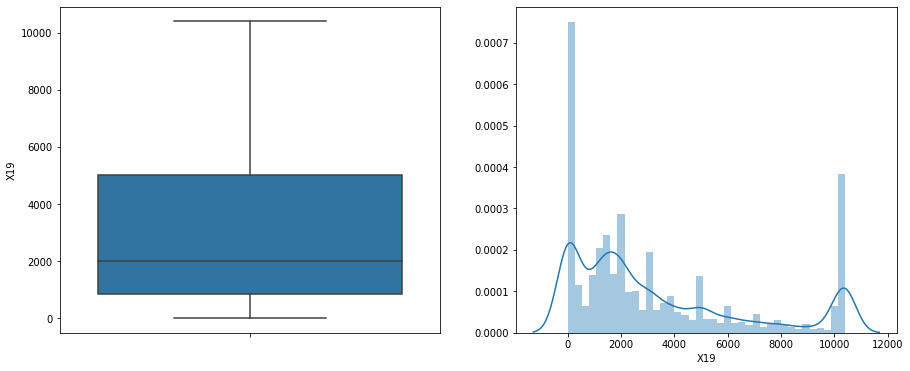

In [115]:
# Lets remove outliers using capping for X13 Variable
outlier_removal(0.90,0,'X19')
box_plott('X19')


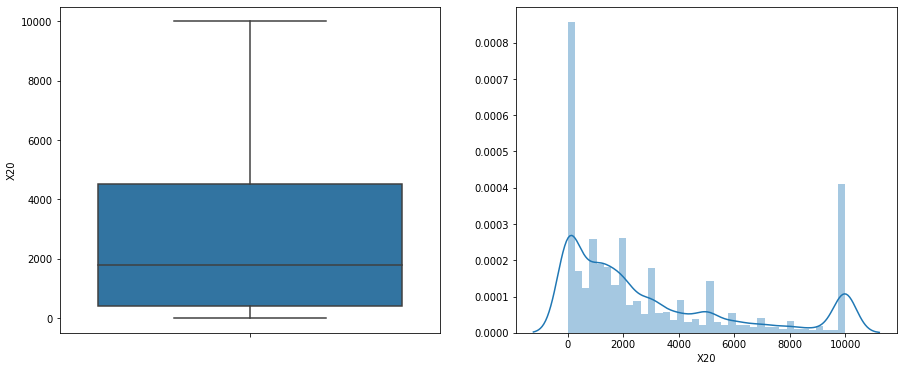

In [116]:
# Lets remove outliers using capping for X20 Variable
outlier_removal(0.90,0,'X20')
box_plott('X20')


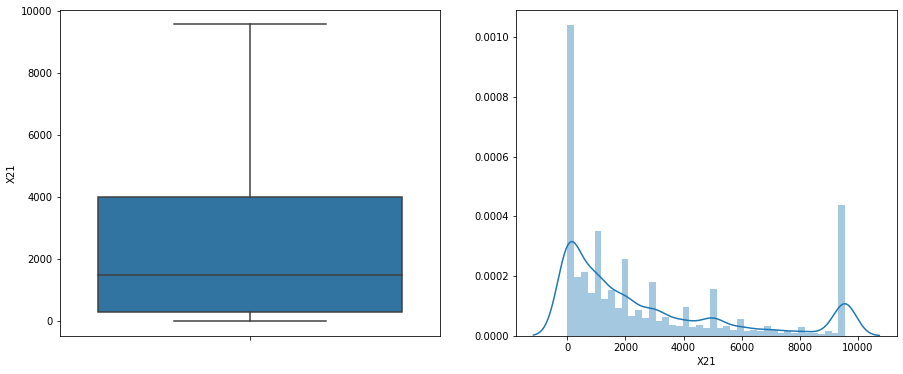

In [117]:
# Lets remove outliers using capping for X21 Variable
outlier_removal(0.90,0,'X21')
box_plott('X21')


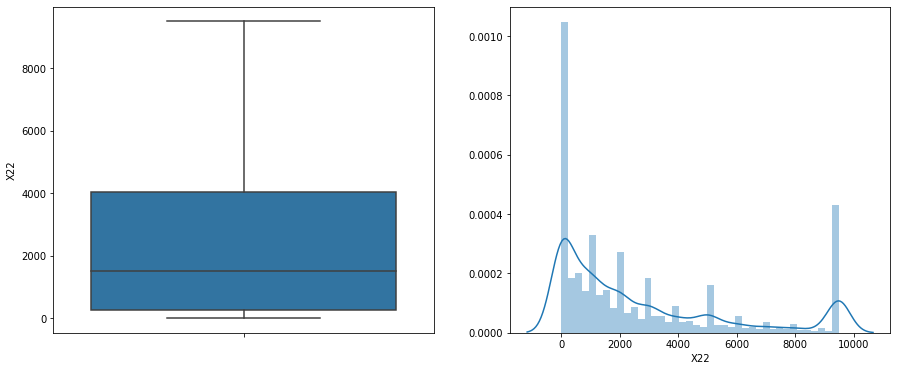

In [118]:
# Lets remove outliers using capping for X22 Variable
outlier_removal(0.90,0,'X22')
box_plott('X22')


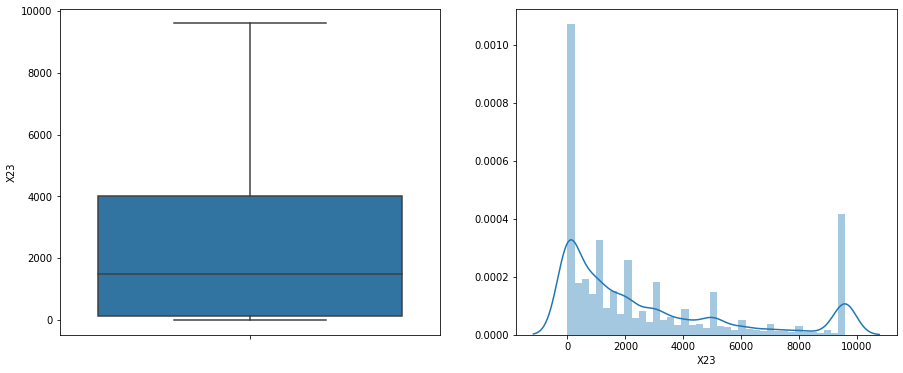

In [119]:
# Lets remove outliers using capping for X23 Variable
outlier_removal(0.90,0,'X23')
box_plott('X23')


In [120]:
for var in categorical_var:
    print(dataset_copy[var].value_counts() / np.float(len(dataset_copy)))
    print()

2    0.603733
1    0.396267
Name: X2, dtype: float64

2    0.467667
1    0.352833
3    0.163900
5    0.009333
4    0.004100
6    0.001700
0    0.000467
Name: X3, dtype: float64

2    0.532133
1    0.455300
3    0.010767
0    0.001800
Name: X4, dtype: float64

 0    0.491233
-1    0.189533
 1    0.122933
-2    0.091967
 2    0.088900
 3    0.010733
 4    0.002533
 5    0.000867
 8    0.000633
 6    0.000367
 7    0.000300
Name: X6, dtype: float64

 0    0.524333
-1    0.201667
 2    0.130900
-2    0.126067
 3    0.010867
 4    0.003300
 1    0.000933
 5    0.000833
 7    0.000667
 6    0.000400
 8    0.000033
Name: X7, dtype: float64

 0    0.525467
-1    0.197933
-2    0.136167
 2    0.127300
 3    0.008000
 4    0.002533
 7    0.000900
 6    0.000767
 5    0.000700
 1    0.000133
 8    0.000100
Name: X8, dtype: float64

 0    0.548500
-1    0.189567
-2    0.144933
 2    0.105300
 3    0.006000
 4    0.002300
 7    0.001933
 5    0.001167
 6    0.000167
 1    0.000067
 8    0.000067
Na

In [128]:
#Since X3 contains: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). So need to treat outliers.
dataset_copy.loc[((dataset_copy.X3==0)|(dataset_copy.X3==5)|(dataset_copy.X3==6)),'X3']=4

In [129]:
dataset_copy.X3.value_counts()

2    14030
1    10585
3     4917
4      468
Name: X3, dtype: int64

In [130]:
#Same for Variabke X4 contains : Marital status (1 = married; 2 = single; 3 = others).So need to assign 3 for other than these no.s
dataset_copy.loc[(dataset_copy.X4==0),'X4']=3
dataset_copy.X4.value_counts()

2    15964
1    13659
3      377
Name: X4, dtype: int64

In [132]:
pd.set_option('display.max_columns', None)

In [133]:
dataset_copy.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30000.0,30000,30000,30000,30000.0,30000,30000,30000,30000,30000,30000,30000,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000,30000.0,30000.0,30000.0,30000
unique,45.0,2,4,3,33.0,11,11,11,11,10,10,22723,19378.0,18692.0,18211.0,17653.0,17226.0,5702.0,5599.0,5347,4971.0,4943.0,4921.0,2
top,50000.0,2,2,2,53.0,0,0,0,0,0,0,0,136905.5,132051.3,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0
freq,3365.0,18112,14030,15964,1625.0,14737,15730,15764,16455,16947,16286,2008,3000.0,3000.0,3870.0,4161.0,4708.0,5249.0,5396.0,5968,6408.0,6703.0,7173.0,23364


In [137]:
#Lets Plot Categorical Features
cate_dataset_copy = dataset_copy[['X2','X3','X4']]
cate_dataset_copy = cate_dataset_copy.rename(columns={'X2':'Gender','X3':'Education','X4':'Marital_status'})
cate_dataset_copy['Isdefaulter']=dataset_copy['Y']

In [145]:
cate_dataset_copy.replace({'Gender':{1:'Male',2:'Female'},'Education':{1:'graduate school', 2:'university',3:'high_school', 4:'others'},'Marital_status':{1:'married', 2:'single',3:'others'}},inplace=True)

<Figure size 1080x576 with 0 Axes>

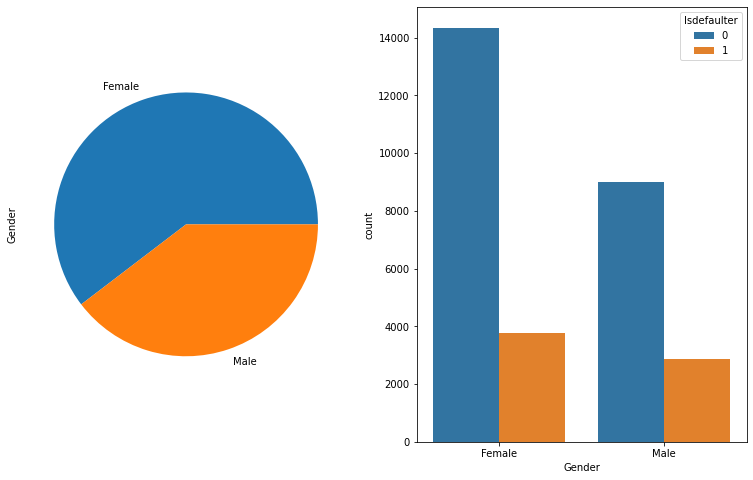

<Figure size 1080x576 with 0 Axes>

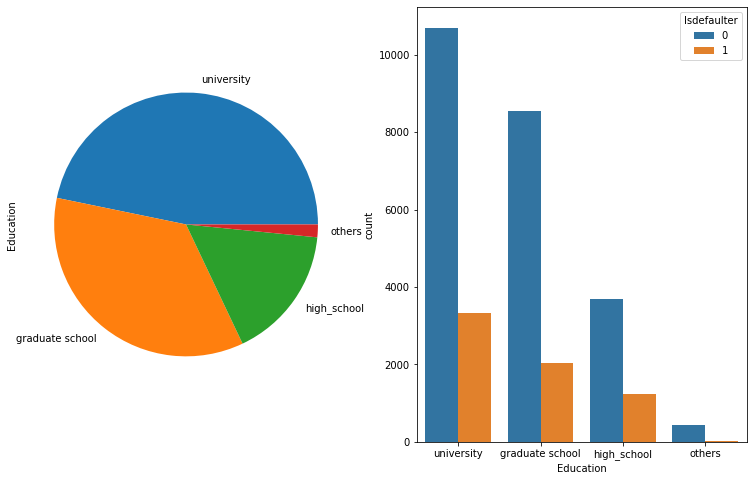

<Figure size 1080x576 with 0 Axes>

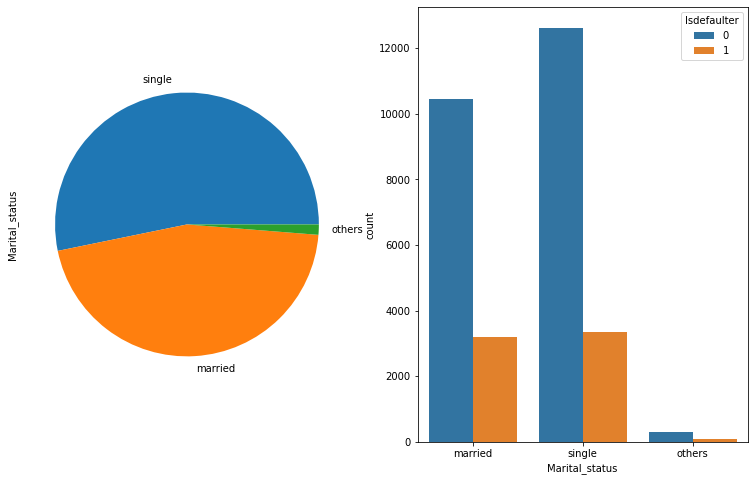

In [146]:
for col in cate_dataset_copy.columns[:-1]:
  plt.figure(figsize=(15,8))
  fig, axes = plt.subplots(ncols=2,figsize=(13,8))
  cate_dataset_copy[col].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
  sns.countplot(x = col, hue = 'Isdefaulter', data = cate_dataset_copy)

we have few observations for categorical features:

* Dataset have more females credit card holder,so number of defaulter have high proportion of females.
* Number of defaulters have a higher possibility that he is graduated from school and university ie.The order follows as            
University>graduate school>High School>Others
* Number of defaulters have a higher proportion of Singles.